# Introduction to Seaborn

In [130]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


# Numerical Plots
* Distribution: Histogram(biểu đồ phân bố tần suất),KDE - phân bổ ước lượng ,displot 
* Bar Plot : biểu đồ cột
* Count Plot :   biểu đồ thể hiện số lượng
* Facel Plot : đồ thị dạng 2D
* Box plot : phương pháp mô tả bằng đồ thị từ nhóm dữ liệu thông qua các phần tử của mảng
* Join Plot : biểu đồ hình dung phân phối chuẩn
* Pair Plot 
* Heat Map  : kỹ thuật trực quan hóa dữ liệu cho thấy cường độ là màu sắc hai chiều


In [5]:
# Distribution Plot
tips_df = sns.load_dataset('tips')

In [19]:
sns.set_theme()

In [16]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


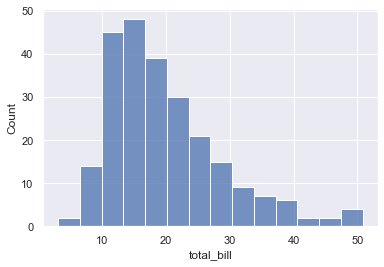

In [20]:
sns.histplot(data = tips_df['total_bill']);

In [10]:
tips_df['total_bill'].value_counts().sort_values(ascending=False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

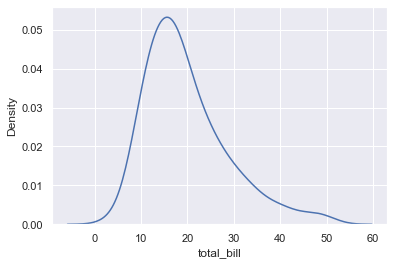

In [21]:
# KDI Plot
sns.kdeplot(data=tips_df['total_bill']);

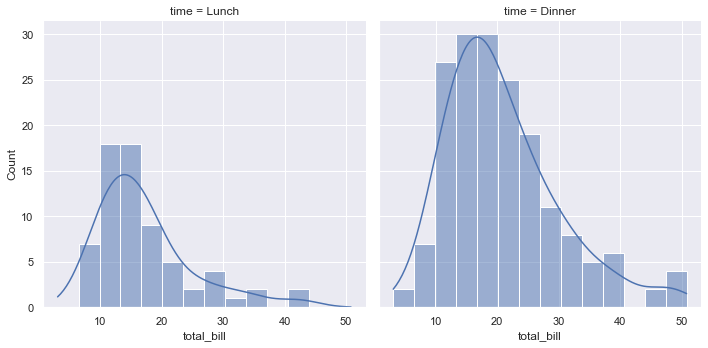

In [22]:
# Displot 
# tich hop Distribution and KPI
sns.displot(data=tips_df,x="total_bill",col="time",kde=True);

In [23]:
# Bar Plots : bieu do cot
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


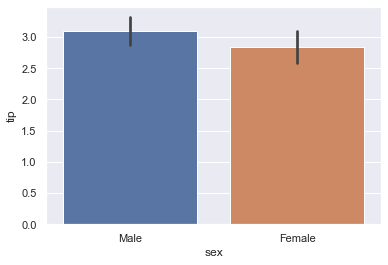

In [24]:
# tim hieu nam hay nu ai tra tien tip cao hon
sns.barplot(data=tips_df,x="sex",y="tip",estimator=np.mean);

In [25]:
# Count Plot
# graph dem bao nhieu nam nu
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

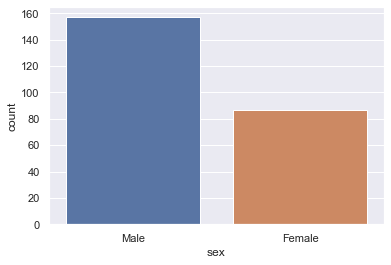

In [26]:
sns.countplot(data=tips_df,x="sex");

In [27]:
# Box Plot
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


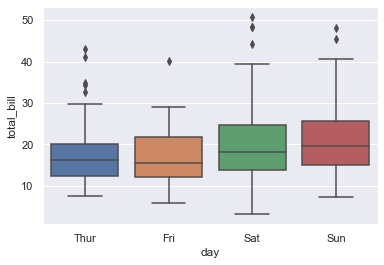

In [28]:
sns.boxplot(data=tips_df,x="day",y="total_bill");

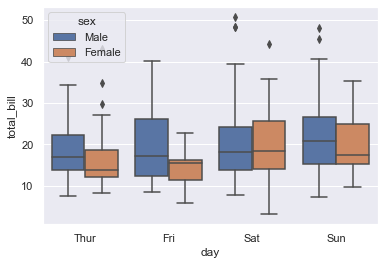

In [29]:
# xem nam hay nu tra nhieu hon
sns.boxplot(data=tips_df,x="day",y="total_bill",hue="sex");

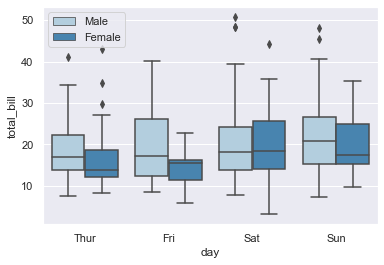

In [33]:
sns.boxplot(data=tips_df,x="day",y="total_bill",
            hue="sex",palette="Blues"'');
plt.legend(loc=0);

In [34]:
# Facet Grid
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


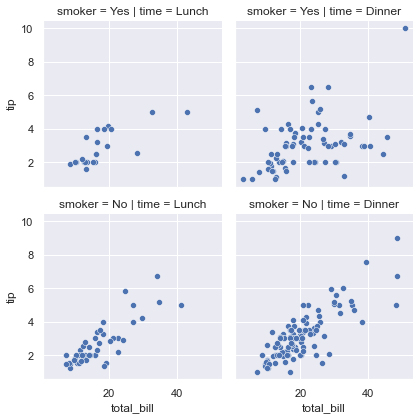

In [37]:
tip_fg = sns.FacetGrid(data=tips_df,row="smoker",col="time") #creat a class of Facet Grid
tip_fg.map(sns.scatterplot,'total_bill','tip');
# su tuong quan time, smoker

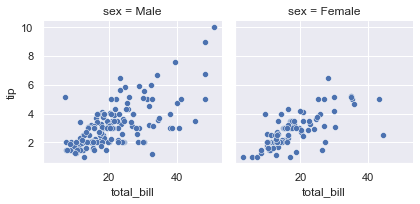

In [44]:
new_fg = sns.FacetGrid(data=tips_df,col="sex")
new_fg.map(sns.scatterplot,"total_bill","tip");

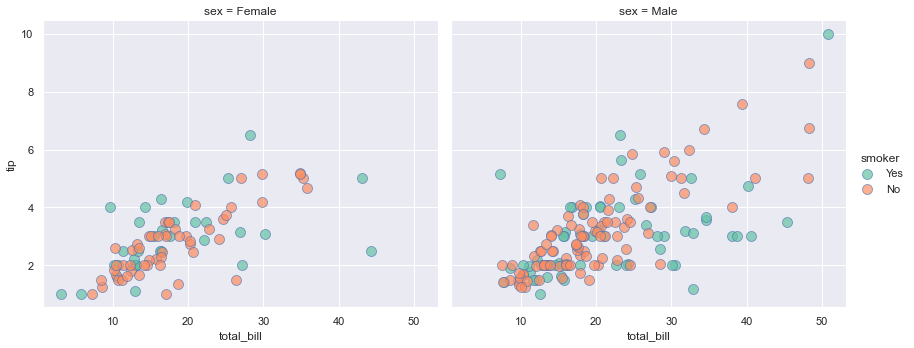

In [59]:
new_fg = sns.FacetGrid(data=tips_df,col="sex",
            hue="smoker",
            palette='Set2',
            height=5,aspect=1.2,
            col_order=["Female","Male"])
new_fg.map(sns.scatterplot,"total_bill","tip",
           s=100,edgecolor='b',alpha = 0.7);
new_fg.add_legend();

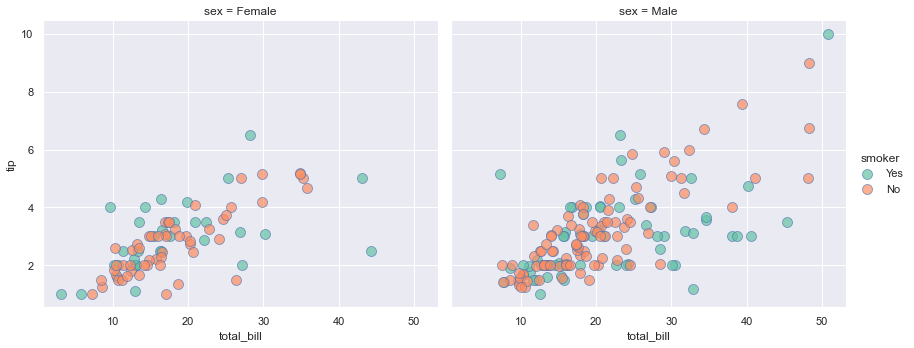

In [61]:
kws = dict(s=100,edgecolor='b',alpha=0.7)
new_fg = sns.FacetGrid(data=tips_df,col="sex",
            hue="smoker",
            palette='Set2',
            height=5,aspect=1.2,
            col_order=["Female","Male"])
new_fg.map(sns.scatterplot,"total_bill","tip",
          **kws);
new_fg.add_legend();

In [69]:
#Joint Plot
penguis_df = sns.load_dataset('penguins') #datasheet chim canh cut

In [70]:
penguis_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


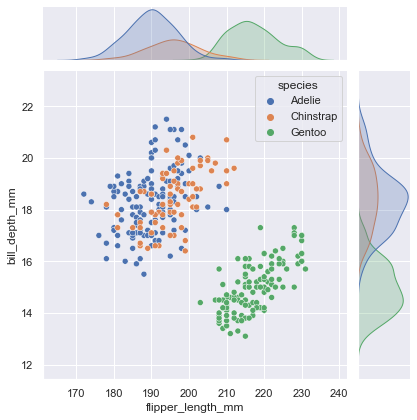

In [71]:
sns.jointplot(data=penguis_df,x="flipper_length_mm",y="bill_depth_mm",
             hue="species");

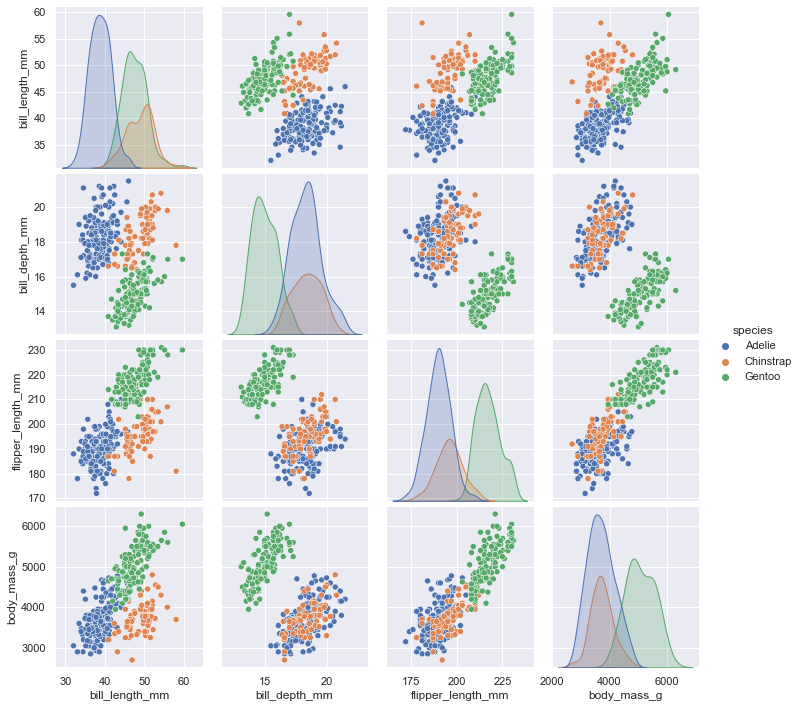

In [72]:
# Pair Plots - tu bat cap tuong quan
sns.pairplot(data=penguis_df,hue="species");

In [73]:
# heatmaps : cuong do khac nhau trong data -> bieu do nhiet
flight_df = sns.load_dataset("flights")

In [74]:
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [84]:
# pivot_table de de xu ly
flights = pd.pivot_table(flight_df,index='month',columns='year',values='passengers')

In [82]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


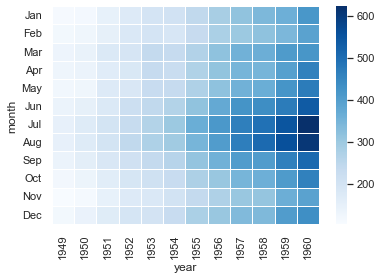

In [89]:
sns.heatmap(data=flights,cmap='Blues',linecolor='white'
            ,linewidths=1);

# Example : Nutrition Data Visualisation on 80 cereal Products 
#dinh duong tren 80 loai ngu coc

In [108]:
  cereal_df = pd.read_csv('cereal.csv')

In [109]:
cereal_df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [110]:
# irrelevant fields - cut nhung cai ko lien quan toi dinh duong
fields = ['shelf','weight','cups','rating']
cereal_df_new = cereal_df.drop(fields,axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [106]:
# corr() : phep toan nhan cac ma tran voi nhau chi nhan nhung gia tri float or int (so hoc)
cereal_corr = cereal_df_new.corr() #nham tim moi tuong quan du lieu
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [112]:
# ones_line can build a maxtrix of booleans (True,False) with the same shape as our data
ones_corr = np.ones_like(cereal_corr,dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [113]:
ones_corr.shape,cereal_corr.shape

((9, 9), (9, 9))

In [117]:
# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr) #get 1 nua cua head
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

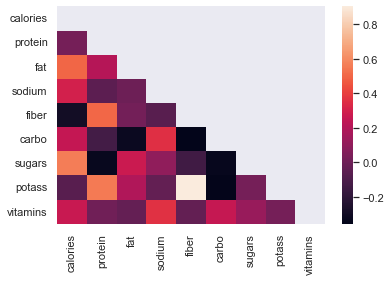

In [119]:
sns.heatmap(data=cereal_corr,mask= mask);

In [121]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [123]:
adjusted_mask_corr = cereal_corr.iloc[1: , :-1]

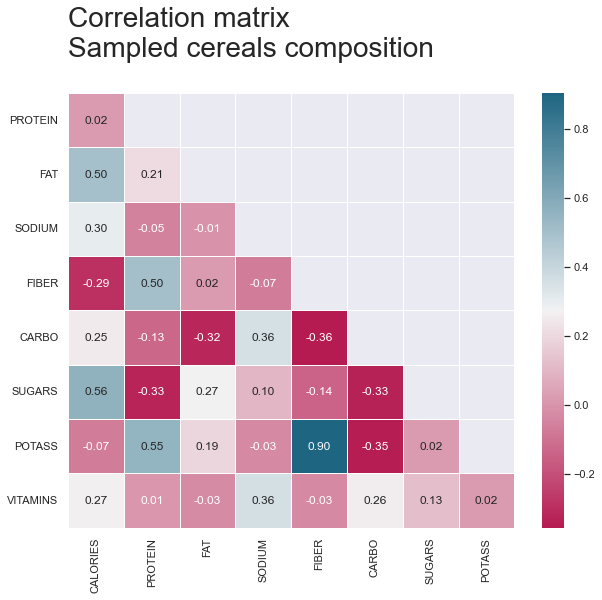

In [159]:
# draw headmask
cmap = sns.diverging_palette(0,230,90,40, as_cmap=True)
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=adjusted_mask_corr,mask=adjusted_mask,
           annot=True,fmt=".2f",cmap=cmap,
            linecolor="white",linewidths=0.5
           );
# lam cho x va y label viet hoa
yticks = [i.upper() for i in adjusted_mask_corr.index]
xticks = [i.upper() for i in adjusted_mask_corr.columns]

ax.set_yticklabels(yticks,rotation=0)
ax.set_xticklabels(xticks,rotation=90);
title = 'Correlation matrix\nSampled cereals composition\n' #su tuong quan giua cac chat dinh duong trong ngu coc
ax.set_title(title,loc='left',fontsize=28);